In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import statistics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import r2_score
from rfpimp import permutation_importances
%matplotlib inline

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = pd.read_excel('20210530_corpus_II_clustering.xlsx')
df.head(3)

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Newspaper,Date,Reviewer,Title,Theatre,Rating,Review,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Cluster,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Top_10_Keywords,Start_Review_1,End_Review_1,Start_Review_2,End_Review_2,Start_Review_3,End_Review_3,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,First_Name_Reviewer,Gender_First_Name_Reviewer,index,ID_x,Virgules_pct,Point_virgules_pct,Tirets_pct,ID_y,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,ID_x.1,Passe,Present,Futur,ID_y.1,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,0,0,0,West End Winghers,2011-12-08,Phil,The Seagull Effect,Zoo Roxy,NaN,"Well, since Andrew wasn’t sending any cards fr...",51.536688,-0.153181,2011.0,0,1,1,1,0,2,0,3,3,0,3,Character_Cat,0.060,0.825,0.115,0.9798,0.131667,0.515617,0.03,0.44,0.10,0.24,0.19,"[('stories', 0.16588262840080872), ('head', 0....","['Well, since Andrew wasn’t sending any cards ...",[' Who would have thought?\nCaveat emptor: the...,"['Well, since Andrew wasn’t sending any cards ...","[' Quite, quite remarkable', ' Who would have ...","['Well, since Andrew wasn’t sending any cards ...",['\nThe whole thing turned out to be very Whin...,20,22,13,26,17,42,27,0,1,0,1,0,1,0,0,0,0,0,0,4.59,5.54,4.73,5.81,4.41,5.27,n.a,n.a.,0,0,100.000000,0.000000,0.0,0,86.363636,13.636364,0.000000,0,29.0,33.0,0.0,0,0.0,1.0,7.0,2.0,1.0,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,2,2,0,0
1,1,1,1,WEST END WILMA,2017-10-10,Neil Mcfarlane,Deathtrap,Yvonne Arnaud Theatre,NaN,\nDeathtrap; a truly satisfactory spine-chille...,51.233552,-0.575087,2017.0,0,1,3,1,0,1,0,0,1,0,3,Show_Cat,0.096,0.680,0.224,0.9911,0.309888,0.557599,0.03,0.20,0.34,0.17,0.26,"[('deathtrap', 0.24802735187988478), ('sidney'...",['\nDeathtrap; a truly satisfactory spine-chil...,['\n“Deathtrap” offers a riveting blend of sus...,['\nDeathtrap; a truly satisfactory spine-chil...,['\nThere is a great set to enjoy from designe...,['\nDeathtrap; a truly satisfactory spine-chil...,['\nMeanwhile as psychic neighbor Helga Ten Do...,11,5,10,41,47,79,87,0,0,0,0,0,0,0,0,0,0,1,0,8.6,5.9,5.05,5.02,4.64,4.87,NaN,n.a.,1,1,93.333333,6.666667,0.0,1,90.909091,0.000000,9.090909,1,7.0,25.0,1.0,1,2.0,2.0,11.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,2,2,2,WEST END WILMA,2017-05-07,Michaela Clement-Hayes,OUR MAN IN HAVANA,Yvonne Arnaud Theatre,NaN,\nCuba has become the tourist destination of 2...,51.233552,-0.575087,2017.0,1,1,2,4,0,0,0,1,1,0,4,Story_Cat,0.117,0.711,0.172,0.9828,0.196164,0.524868,0.05,0.41,0.12,0.19,0.22,"[('carter', 0.17322294814731615), ('davies', 0...",['\nCuba has become the tourist destination of...,[' Who knows?\nYet for all the farcical elemen...,['\nCuba has become the tourist destination of...,"[' Or the inner workings of a vacuum cleaner',...",['\nCuba has become the tourist destination of...,"['\nConsidering the small cast, the attention ...",21,8,23,35,32,64,65,0,1,0,1,0,1,0,0,0,0,0,0,5,5.57,5.09,5.23,5.21,5.06,NaN,n.a.,2,2,100.000000,0.000000,0.0,2,95.238095,4.761905,0.000000,2,17.0,38.0,0.0,2,0.0,0.0,12.0,0.0,1.0,3,0,0,0,0,0,2,0,0,2,0,0,0,1,1,1,0,0,0,0


In [3]:
df1 = df
df1 = df1.loc[:, ~df1.columns.str.contains('^Unnamed')]

In [4]:
df1.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Review,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Cluster,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Top_10_Keywords,Start_Review_1,End_Review_1,Start_Review_2,End_Review_2,Start_Review_3,End_Review_3,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,First_Name_Reviewer,Gender_First_Name_Reviewer,index,ID_x,Virgules_pct,Point_virgules_pct,Tirets_pct,ID_y,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,ID_x.1,Passe,Present,Futur,ID_y.1,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,West End Winghers,2011-12-08,Phil,The Seagull Effect,Zoo Roxy,NaN,"Well, since Andrew wasn’t sending any cards fr...",51.536688,-0.153181,2011.0,0,1,1,1,0,2,0,3,3,0,3,Character_Cat,0.060,0.825,0.115,0.9798,0.131667,0.515617,0.03,0.44,0.10,0.24,0.19,"[('stories', 0.16588262840080872), ('head', 0....","['Well, since Andrew wasn’t sending any cards ...",[' Who would have thought?\nCaveat emptor: the...,"['Well, since Andrew wasn’t sending any cards ...","[' Quite, quite remarkable', ' Who would have ...","['Well, since Andrew wasn’t sending any cards ...",['\nThe whole thing turned out to be very Whin...,20,22,13,26,17,42,27,0,1,0,1,0,1,0,0,0,0,0,0,4.59,5.54,4.73,5.81,4.41,5.27,n.a,n.a.,0,0,100.000000,0.000000,0.0,0,86.363636,13.636364,0.000000,0,29.0,33.0,0.0,0,0.0,1.0,7.0,2.0,1.0,2,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,2,2,0,0
1,WEST END WILMA,2017-10-10,Neil Mcfarlane,Deathtrap,Yvonne Arnaud Theatre,NaN,\nDeathtrap; a truly satisfactory spine-chille...,51.233552,-0.575087,2017.0,0,1,3,1,0,1,0,0,1,0,3,Show_Cat,0.096,0.680,0.224,0.9911,0.309888,0.557599,0.03,0.20,0.34,0.17,0.26,"[('deathtrap', 0.24802735187988478), ('sidney'...",['\nDeathtrap; a truly satisfactory spine-chil...,['\n“Deathtrap” offers a riveting blend of sus...,['\nDeathtrap; a truly satisfactory spine-chil...,['\nThere is a great set to enjoy from designe...,['\nDeathtrap; a truly satisfactory spine-chil...,['\nMeanwhile as psychic neighbor Helga Ten Do...,11,5,10,41,47,79,87,0,0,0,0,0,0,0,0,0,0,1,0,8.6,5.9,5.05,5.02,4.64,4.87,NaN,n.a.,1,1,93.333333,6.666667,0.0,1,90.909091,0.000000,9.090909,1,7.0,25.0,1.0,1,2.0,2.0,11.0,0.0,0.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
2,WEST END WILMA,2017-05-07,Michaela Clement-Hayes,OUR MAN IN HAVANA,Yvonne Arnaud Theatre,NaN,\nCuba has become the tourist destination of 2...,51.233552,-0.575087,2017.0,1,1,2,4,0,0,0,1,1,0,4,Story_Cat,0.117,0.711,0.172,0.9828,0.196164,0.524868,0.05,0.41,0.12,0.19,0.22,"[('carter', 0.17322294814731615), ('davies', 0...",['\nCuba has become the tourist destination of...,[' Who knows?\nYet for all the farcical elemen...,['\nCuba has become the tourist destination of...,"[' Or the inner workings of a vacuum cleaner',...",['\nCuba has become the tourist destination of...,"['\nConsidering the small cast, the attention ...",21,8,23,35,32,64,65,0,1,0,1,0,1,0,0,0,0,0,0,5,5.57,5.09,5.23,5.21,5.06,NaN,n.a.,2,2,100.000000,0.000000,0.0,2,95.238095,4.761905,0.000000,2,17.0,38.0,0.0,2,0.0,0.0,12.0,0.0,1.0,3,0,0,0,0,0,2,0,0,2,0,0,0,1,1,1,0,0,0,0


In [5]:
df1["Rating"].unique()

array([nan,  0.,  5.,  4.,  3.,  1.,  2.])

In [6]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20019 entries, 0 to 20018
Columns: 106 entries, Newspaper to Violence
dtypes: datetime64[ns](1), float64(29), int64(50), object(26)
memory usage: 16.2+ MB


In [7]:
df1.describe()

,Rating,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Nbr_of_Sentences,Length_Start_Count_Words_1,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,index,ID_x,Virgules_pct,Point_virgules_pct,Tirets_pct,ID_y,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,ID_x.1,Passe,Present,Futur,ID_y.1,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
count,6182.000000,20019.000000,20019.000000,14661.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,19613.000000,19613.000000,19613.0,20019.000000,19740.000000,19740.000000,19740.000000,20019.000000,19900.000000,19900.000000,19900.000000,20019.000000,19900.000000,19900.000000,19900.000000,19900.000000,19900.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000,20019.000000
mean,3.220964,51.457282,-0.036840,2015.825660,0.309906,1.024627,3.175483,1.339827,0.004596,1.980568,0.618712,1.640991,1.506968,0.932814,3.593486,0.074994,0.780415,0.138503,0.628032,0.128520,0.497435,0.060468,0.396492,0.125319,0.215418,0.191979,22.107398,22.645087,0.045956,0.020431,0.068485,0.040462,0.089265,0.061092,0.020181,0.015385,0.035816,0.029372,0.047205,0.039962,10009.000000,10009.000000,96.229655,3.770345,0.0,10009.000000,94.679295,3.371623,1.949082,10009.000000,23.111156,48.106834,0.393719,10009.000000,4.083618,1.830000,8.660201,2.232060,3.929447,0.816524,0.420001,0.044158,0.248314,0.074429,0.175883,1.745442,0.365753,0.235576,1.037764,0.180578,0.842100,0.068185,0.800290,0.882612,0.852140,0.491333,0.531095,0.357011,0.198262
std,1.345516,1.696235,3.423541,2.947684,0.526515,0.884669,1.589010,1.158771,0.067637,1.358606,0.593224,1.358925,1.235360,0.973847,1.445721,0.043464,0.084189,0.050268,0.670194,0.093119,0.095978,0.047638,0.105925,0.076619,0.086329,0.078767,12.836563,17.107614,0.209396,0.141471,0.252583,0.197044,0.285133,0.239505,0.140622,0.123083,0.185836,0.168851,0.212083,0.195875,5779.131855,5779.131855,5.472446,5.472446,0.0,5779.131855,8.815464,7.262429,4.841310,5779.131855,15.755532,26.322883,0.804599,5779.131855,6.453851,3.045956,8.103600,3.108491,3.857420,1.016133,0.736508,0.248581,0.524294,0.278720,0.540022,1.352292,0.665282,0.487070,0.712962,0.469268,1.075571,0.269316,0.826114,0.904417,0.782091,0.676794,0.883214,0.587760,0.462074
min,0.000000,-34.927846,-99.516979,2004.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.999800,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [8]:
df2 = df1[df1['Rating'].notna()].reset_index(drop=True)

In [9]:
df2.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Review,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Cluster,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Top_10_Keywords,Start_Review_1,End_Review_1,Start_Review_2,End_Review_2,Start_Review_3,End_Review_3,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,First_Name_Reviewer,Gender_First_Name_Reviewer,index,ID_x,Virgules_pct,Point_virgules_pct,Tirets_pct,ID_y,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,ID_x.1,Passe,Present,Futur,ID_y.1,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,Sardines Blog,2019-09-27,Admin,Blood Wedding,"Young Vic, 66 The Cut, Waterloo, London",0.0,The Company Blood Wedding. Photo: MarcBrenner\...,51.503161,-0.107526,NaN,0,2,4,2,0,3,2,1,0,1,4,Show_Cat,0.050,0.799,0.152,0.9941,0.145383,0.479853,0.10,0.32,0.16,0.28,0.15,"[('pieces', 0.15843421140080602), ('feeling', ...",['The Company Blood Wedding'],['\nOlwen Fouéré & Aoife Duffin Blood Wedding'],"['The Company Blood Wedding', ' Photo: MarcBre...",[' Definitely worth catching before November a...,"['The Company Blood Wedding', ' Photo: MarcBre...",[' Often I am wary of versions of well-known o...,23,4,7,44,22,73,46,0,0,0,0,0,0,0,0,0,0,0,0,5.5,5,5.41,5.57,5.43,5.05,n.a,n.a.,7,7,100.000000,0.000000,0.0,7,100.000000,0.0,0.000000,7,24.0,36.0,0.0,7,6.0,6.0,3.0,0.0,2.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,3,1,0,0,2,0
1,Sardines Blog,2019-12-05,Admin,Death of a Salesman,Young Vic - main house,0.0,Wendell Pierce. Death of a Salesman (c) Brinkh...,51.503161,-0.107526,NaN,0,2,5,3,0,2,1,5,1,1,5,Show_Cat,0.122,0.792,0.086,-0.9865,0.087035,0.447754,0.03,0.44,0.07,0.27,0.19,"[('family', 0.16967463464130142), ('pierce', 0...",['Wendell Pierce'],[' Clarke and Martins Imhangbe'],"['Wendell Pierce', ' Death of a Salesman (c) B...","['\nArinze Kene, Sharon D', ' Clarke and Marti...","['Wendell Pierce', ' Death of a Salesman (c) B...",[' Miller’s tired and jaded salesman is now ju...,33,2,5,32,9,60,33,0,0,0,0,0,0,0,0,0,0,0,0,6.5,6,5.75,5.25,5.42,5.03,n.a,n.a.,14,14,95.652174,4.347826,0.0,14,96.969697,0.0,3.030303,14,34.0,61.0,2.0,14,8.0,4.0,7.0,4.0,6.0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,1,1,2,0,0,1
2,A YOUNGER THEATER,2019-03-10,Iris Pearson,Blood Wedding,Young Vic,5.0,\n‘Marina is a lightning conductor for pulling...,51.503161,-0.107526,2019.0,0,1,3,2,0,3,1,1,3,1,3,Show_Cat,0.085,0.786,0.129,0.9870,0.142388,0.474265,0.12,0.42,0.04,0.18,0.23,"[('set', 0.17380116068130558), ('carr', 0.1708...",['\n‘Marina is a lightning conductor for pulli...,[' When she finishes her degree she wants to: ...,['\n‘Marina is a lightning conductor for pulli...,['\n Aoife DuffinBlood WeddingFederico Garcia ...,['\n‘Marina is a lightning conductor for pulli...,"[' For more information and tickets, visit the...",29,24,28,52,49,85,60,0,0,0,0,0,0,0,0,0,0,0,0,5.08,4.37,5.31,6.08,5.1,5.93,Iris,female,25,25,88.235294,11.764706,0.0,25,100.000000,0.0,0.000000,25,20.0,81.0,0.0,25,2.0,1.0,14.0,2.0,2.0,2,1,0,0,0,0,4,0,1,1,0,1,0,0,2,1,1,0,0,1


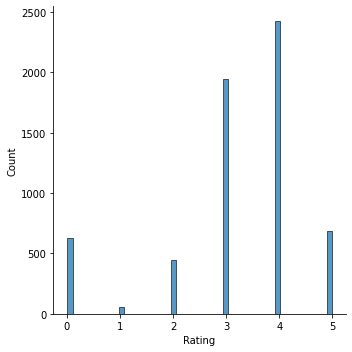

In [10]:
sns.displot(df2["Rating"])

In [11]:
df2.head(3)

,Newspaper,Date,Reviewer,Title,Theatre,Rating,Review,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Cluster,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Top_10_Keywords,Start_Review_1,End_Review_1,Start_Review_2,End_Review_2,Start_Review_3,End_Review_3,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,First_Name_Reviewer,Gender_First_Name_Reviewer,index,ID_x,Virgules_pct,Point_virgules_pct,Tirets_pct,ID_y,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,ID_x.1,Passe,Present,Futur,ID_y.1,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,Sardines Blog,2019-09-27,Admin,Blood Wedding,"Young Vic, 66 The Cut, Waterloo, London",0.0,The Company Blood Wedding. Photo: MarcBrenner\...,51.503161,-0.107526,NaN,0,2,4,2,0,3,2,1,0,1,4,Show_Cat,0.050,0.799,0.152,0.9941,0.145383,0.479853,0.10,0.32,0.16,0.28,0.15,"[('pieces', 0.15843421140080602), ('feeling', ...",['The Company Blood Wedding'],['\nOlwen Fouéré & Aoife Duffin Blood Wedding'],"['The Company Blood Wedding', ' Photo: MarcBre...",[' Definitely worth catching before November a...,"['The Company Blood Wedding', ' Photo: MarcBre...",[' Often I am wary of versions of well-known o...,23,4,7,44,22,73,46,0,0,0,0,0,0,0,0,0,0,0,0,5.5,5,5.41,5.57,5.43,5.05,n.a,n.a.,7,7,100.000000,0.000000,0.0,7,100.000000,0.0,0.000000,7,24.0,36.0,0.0,7,6.0,6.0,3.0,0.0,2.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,3,1,0,0,2,0
1,Sardines Blog,2019-12-05,Admin,Death of a Salesman,Young Vic - main house,0.0,Wendell Pierce. Death of a Salesman (c) Brinkh...,51.503161,-0.107526,NaN,0,2,5,3,0,2,1,5,1,1,5,Show_Cat,0.122,0.792,0.086,-0.9865,0.087035,0.447754,0.03,0.44,0.07,0.27,0.19,"[('family', 0.16967463464130142), ('pierce', 0...",['Wendell Pierce'],[' Clarke and Martins Imhangbe'],"['Wendell Pierce', ' Death of a Salesman (c) B...","['\nArinze Kene, Sharon D', ' Clarke and Marti...","['Wendell Pierce', ' Death of a Salesman (c) B...",[' Miller’s tired and jaded salesman is now ju...,33,2,5,32,9,60,33,0,0,0,0,0,0,0,0,0,0,0,0,6.5,6,5.75,5.25,5.42,5.03,n.a,n.a.,14,14,95.652174,4.347826,0.0,14,96.969697,0.0,3.030303,14,34.0,61.0,2.0,14,8.0,4.0,7.0,4.0,6.0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,1,1,2,0,0,1
2,A YOUNGER THEATER,2019-03-10,Iris Pearson,Blood Wedding,Young Vic,5.0,\n‘Marina is a lightning conductor for pulling...,51.503161,-0.107526,2019.0,0,1,3,2,0,3,1,1,3,1,3,Show_Cat,0.085,0.786,0.129,0.9870,0.142388,0.474265,0.12,0.42,0.04,0.18,0.23,"[('set', 0.17380116068130558), ('carr', 0.1708...",['\n‘Marina is a lightning conductor for pulli...,[' When she finishes her degree she wants to: ...,['\n‘Marina is a lightning conductor for pulli...,['\n Aoife DuffinBlood WeddingFederico Garcia ...,['\n‘Marina is a lightning conductor for pulli...,"[' For more information and tickets, visit the...",29,24,28,52,49,85,60,0,0,0,0,0,0,0,0,0,0,0,0,5.08,4.37,5.31,6.08,5.1,5.93,Iris,female,25,25,88.235294,11.764706,0.0,25,100.000000,0.0,0.000000,25,20.0,81.0,0.0,25,2.0,1.0,14.0,2.0,2.0,2,1,0,0,0,0,4,0,1,1,0,1,0,0,2,1,1,0,0,1


In [12]:
df3 = df2[["Rating",
           "Lat",
           "Long",
           "Year",
           "Spectator_Cat",
           "Audience_Cat",
           "Show_Cat",
           "Story_Cat",
           "Decor_Cat",
           "Theatre_Cat",
           "Production_Cat",
           "Character_Cat",
           "End_Cat",
           "Beginning_Cat",
           "Max_Value",
           "Neg",
           "Neu",
           "Pos",
           "Compound",
           "Polarity",
           "Subjectivity",
           "Angry",
           "Fear",
           "Happy",
           "Sad",
           "Surprise",
           "Nbr_of_Sentences",
           "Length_Start_Count_Words_1",
           "Length_End_Count_Words_1",
           "Length_Start_Count_Words_2",
           "Length_End_Count_Words_2",
           "Length_Start_Count_Words_3",
           "Length_End_Count_Words_3",
           "Question_Mark_Start_1",
           "Question_Mark_End_1",
           "Question_Mark_Start_2",
           "Question_Mark_End_2",
           "Question_Mark_Start_3",
           "Question_Mark_End_3",
           "Exclamation_Mark_Start_1",
           "Exclamation_Mark_End_1",
           "Exclamation_Mark_Start_2",
           "Exclamation_Mark_End_2",
           "Exclamation_Mark_Start_3",
           "Exclamation_Mark_End_3",
           "Word_Average_Start_1",
           "Word_Average_End_1",
           "Word_Average_Start_2",
           "Word_Average_End_2",
           "Word_Average_Start_3",
           "Word_Average_End_3",
           "Virgules_pct",
           "Point_virgules_pct",
           "Tirets_pct",
           "Declaratives_pct",
           "Interrogatives_pct",
           "Exclamatives_pct",
           "Passe",
           "Present",
           "Futur",
           "1e_pers_s",
           "2e_pers",
           "3e_pers_s",
           "1e_pers_p",
           "3e_pers_p",
           "Women/Feminism",
           "LGBT / Queer / Sexuality / Gender",
           "Disabled",
           "Politics",
           "Supernatural",
           "Science",
           "Body",
           "Childhood",
           "Cultural difference / Race",
           "Death",
           "Education",
           "Family",
           "Environment",
           "Friendship",
           "Love",
           "Identity",
           "Memory",
           "Relationships",
           "Religion",
           "Violence"]]


In [13]:
df3.head(3)

,Rating,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,Virgules_pct,Point_virgules_pct,Tirets_pct,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,Passe,Present,Futur,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,0.0,51.503161,-0.107526,NaN,0,2,4,2,0,3,2,1,0,1,4,0.050,0.799,0.152,0.9941,0.145383,0.479853,0.10,0.32,0.16,0.28,0.15,23,4,7,44,22,73,46,0,0,0,0,0,0,0,0,0,0,0,0,5.5,5,5.41,5.57,5.43,5.05,100.000000,0.000000,0.0,100.000000,0.0,0.000000,24.0,36.0,0.0,6.0,6.0,3.0,0.0,2.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,3,1,0,0,2,0
1,0.0,51.503161,-0.107526,NaN,0,2,5,3,0,2,1,5,1,1,5,0.122,0.792,0.086,-0.9865,0.087035,0.447754,0.03,0.44,0.07,0.27,0.19,33,2,5,32,9,60,33,0,0,0,0,0,0,0,0,0,0,0,0,6.5,6,5.75,5.25,5.42,5.03,95.652174,4.347826,0.0,96.969697,0.0,3.030303,34.0,61.0,2.0,8.0,4.0,7.0,4.0,6.0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,1,1,2,0,0,1
2,5.0,51.503161,-0.107526,2019.0,0,1,3,2,0,3,1,1,3,1,3,0.085,0.786,0.129,0.9870,0.142388,0.474265,0.12,0.42,0.04,0.18,0.23,29,24,28,52,49,85,60,0,0,0,0,0,0,0,0,0,0,0,0,5.08,4.37,5.31,6.08,5.1,5.93,88.235294,11.764706,0.0,100.000000,0.0,0.000000,20.0,81.0,0.0,2.0,1.0,14.0,2.0,2.0,2,1,0,0,0,0,4,0,1,1,0,1,0,0,2,1,1,0,0,1


In [14]:
df3 = df3.apply(pd.to_numeric, errors='coerce')

In [15]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 85 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Rating                             6182 non-null   float64
 1   Lat                                6182 non-null   float64
 2   Long                               6182 non-null   float64
 3   Year                               4443 non-null   float64
 4   Spectator_Cat                      6182 non-null   int64  
 5   Audience_Cat                       6182 non-null   int64  
 6   Show_Cat                           6182 non-null   int64  
 7   Story_Cat                          6182 non-null   int64  
 8   Decor_Cat                          6182 non-null   int64  
 9   Theatre_Cat                        6182 non-null   int64  
 10  Production_Cat                     6182 non-null   int64  
 11  Character_Cat                      6182 non-null   int64

In [16]:
df3.head(3)

,Rating,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,Virgules_pct,Point_virgules_pct,Tirets_pct,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,Passe,Present,Futur,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,0.0,51.503161,-0.107526,NaN,0,2,4,2,0,3,2,1,0,1,4,0.050,0.799,0.152,0.9941,0.145383,0.479853,0.10,0.32,0.16,0.28,0.15,23,4,7.0,44.0,22.0,73.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,5.50,5.00,5.41,5.57,5.43,5.05,100.000000,0.000000,0.0,100.000000,0.0,0.000000,24.0,36.0,0.0,6.0,6.0,3.0,0.0,2.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,3,1,0,0,2,0
1,0.0,51.503161,-0.107526,NaN,0,2,5,3,0,2,1,5,1,1,5,0.122,0.792,0.086,-0.9865,0.087035,0.447754,0.03,0.44,0.07,0.27,0.19,33,2,5.0,32.0,9.0,60.0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,6.50,6.00,5.75,5.25,5.42,5.03,95.652174,4.347826,0.0,96.969697,0.0,3.030303,34.0,61.0,2.0,8.0,4.0,7.0,4.0,6.0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,1,1,2,0,0,1
2,5.0,51.503161,-0.107526,2019.0,0,1,3,2,0,3,1,1,3,1,3,0.085,0.786,0.129,0.9870,0.142388,0.474265,0.12,0.42,0.04,0.18,0.23,29,24,28.0,52.0,49.0,85.0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,5.08,4.37,5.31,6.08,5.10,5.93,88.235294,11.764706,0.0,100.000000,0.0,0.000000,20.0,81.0,0.0,2.0,1.0,14.0,2.0,2.0,2,1,0,0,0,0,4,0,1,1,0,1,0,0,2,1,1,0,0,1


<AxesSubplot:>

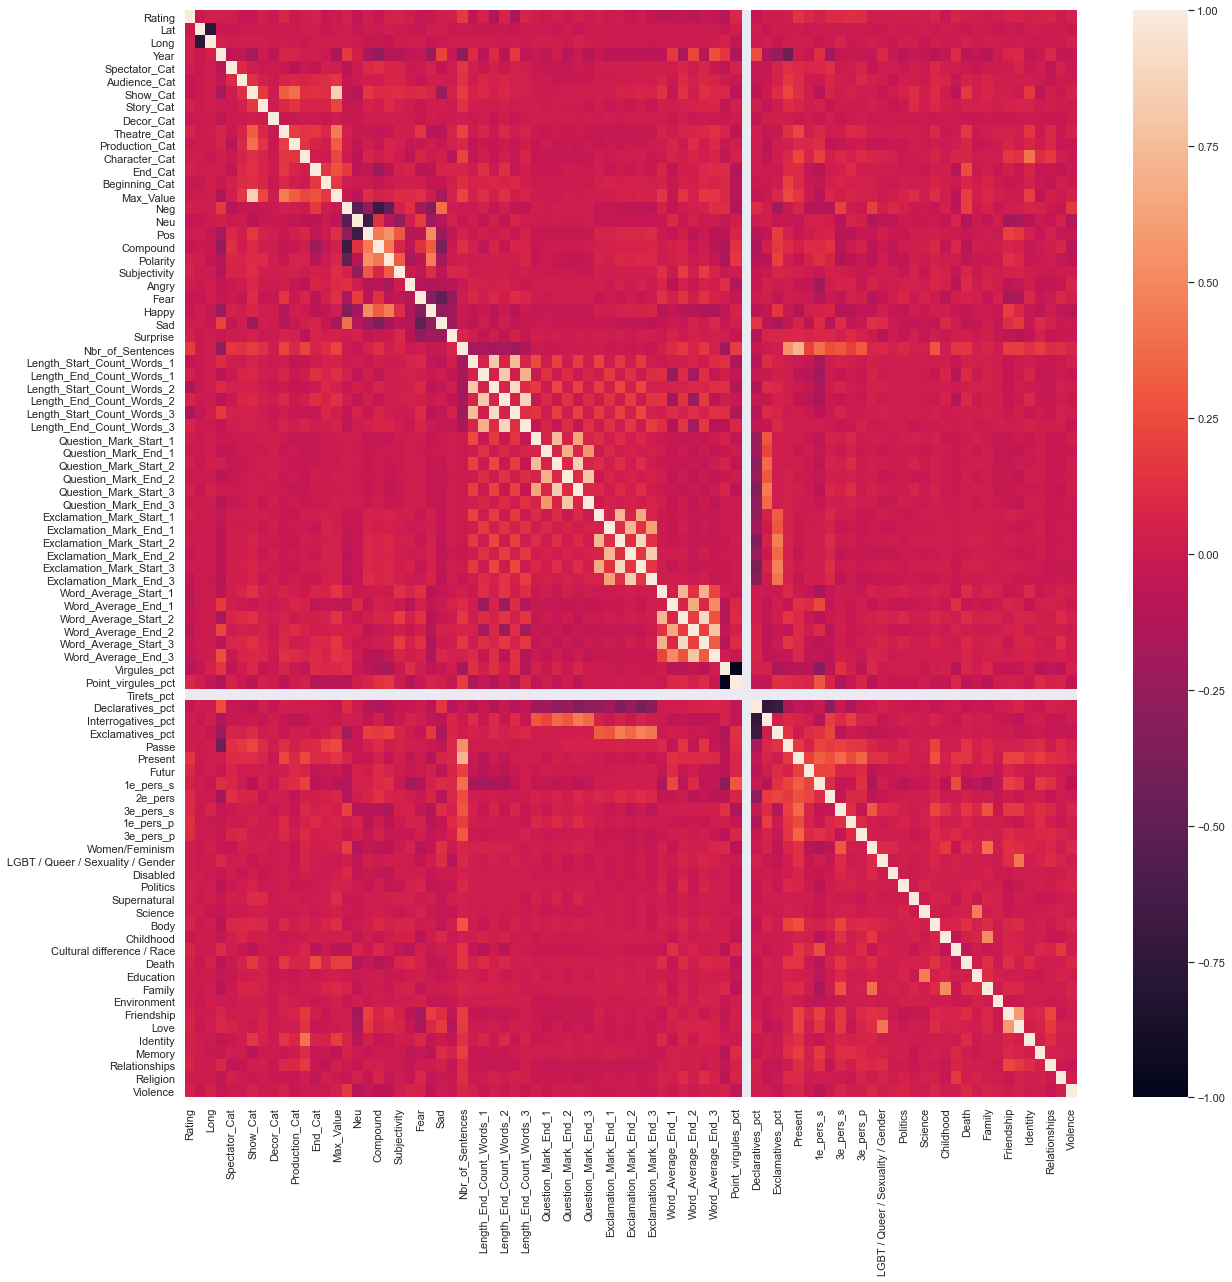

In [17]:
sns.set(rc={'figure.figsize':(20,20)})
sns.heatmap(df3.corr())

In [18]:
def correlation_function(df3):
    label_encoder = LabelEncoder()
    corr_mat = df3.corr(method='pearson')
    df_corr = pd.DataFrame({'Corr_Fields':list(corr_mat["Rating"].index),'Corr_Values': list(corr_mat["Rating"])})
    df_corr = df_corr[df_corr['Corr_Values'].notna()]
    return df_corr

In [19]:
df_corr = correlation_function(df3)
df_corr.head(3)

,Corr_Fields,Corr_Values
0,Rating,1.000000
1,Lat,-0.014593
2,Long,0.040854


In [22]:
df_corr_3

,Corr_Fields,Corr_Values
0,Rating,1.000000
1,Nbr_of_Sentences,0.178451
2,Present,0.146736
3,1e_pers_p,0.119503
4,3e_pers_p,0.104466
5,2e_pers,0.096088
6,3e_pers_s,0.095691
7,Point_virgules_pct,0.090397
8,Futur,0.084348
9,Theatre_Cat,0.071037


In [20]:
df_corr_3 = df_corr.sort_values(by = "Corr_Values", ascending = False).reset_index(drop=True)
df_top = df_corr_3.iloc[0:20]
df_bottom = df_corr_3.iloc[-20:-1]
list_fields_to_include = list(df_top["Corr_Fields"]) + list(df_bottom["Corr_Fields"])
#df3 = df3[list_fields_to_include]
df3.head(3)

,Rating,Lat,Long,Year,Spectator_Cat,Audience_Cat,Show_Cat,Story_Cat,Decor_Cat,Theatre_Cat,Production_Cat,Character_Cat,End_Cat,Beginning_Cat,Max_Value,Neg,Neu,Pos,Compound,Polarity,Subjectivity,Angry,Fear,Happy,Sad,Surprise,Nbr_of_Sentences,Length_Start_Count_Words_1,Length_End_Count_Words_1,Length_Start_Count_Words_2,Length_End_Count_Words_2,Length_Start_Count_Words_3,Length_End_Count_Words_3,Question_Mark_Start_1,Question_Mark_End_1,Question_Mark_Start_2,Question_Mark_End_2,Question_Mark_Start_3,Question_Mark_End_3,Exclamation_Mark_Start_1,Exclamation_Mark_End_1,Exclamation_Mark_Start_2,Exclamation_Mark_End_2,Exclamation_Mark_Start_3,Exclamation_Mark_End_3,Word_Average_Start_1,Word_Average_End_1,Word_Average_Start_2,Word_Average_End_2,Word_Average_Start_3,Word_Average_End_3,Virgules_pct,Point_virgules_pct,Tirets_pct,Declaratives_pct,Interrogatives_pct,Exclamatives_pct,Passe,Present,Futur,1e_pers_s,2e_pers,3e_pers_s,1e_pers_p,3e_pers_p,Women/Feminism,LGBT / Queer / Sexuality / Gender,Disabled,Politics,Supernatural,Science,Body,Childhood,Cultural difference / Race,Death,Education,Family,Environment,Friendship,Love,Identity,Memory,Relationships,Religion,Violence
0,0.0,51.503161,-0.107526,NaN,0,2,4,2,0,3,2,1,0,1,4,0.050,0.799,0.152,0.9941,0.145383,0.479853,0.10,0.32,0.16,0.28,0.15,23,4,7.0,44.0,22.0,73.0,46.0,0,0,0,0,0,0,0,0,0,0,0,0,5.50,5.00,5.41,5.57,5.43,5.05,100.000000,0.000000,0.0,100.000000,0.0,0.000000,24.0,36.0,0.0,6.0,6.0,3.0,0.0,2.0,1,0,0,0,0,0,1,0,1,1,0,1,0,1,3,1,0,0,2,0
1,0.0,51.503161,-0.107526,NaN,0,2,5,3,0,2,1,5,1,1,5,0.122,0.792,0.086,-0.9865,0.087035,0.447754,0.03,0.44,0.07,0.27,0.19,33,2,5.0,32.0,9.0,60.0,33.0,0,0,0,0,0,0,0,0,0,0,0,0,6.50,6.00,5.75,5.25,5.42,5.03,95.652174,4.347826,0.0,96.969697,0.0,3.030303,34.0,61.0,2.0,8.0,4.0,7.0,4.0,6.0,0,0,0,2,0,0,1,0,0,1,0,1,0,0,1,1,2,0,0,1
2,5.0,51.503161,-0.107526,2019.0,0,1,3,2,0,3,1,1,3,1,3,0.085,0.786,0.129,0.9870,0.142388,0.474265,0.12,0.42,0.04,0.18,0.23,29,24,28.0,52.0,49.0,85.0,60.0,0,0,0,0,0,0,0,0,0,0,0,0,5.08,4.37,5.31,6.08,5.10,5.93,88.235294,11.764706,0.0,100.000000,0.0,0.000000,20.0,81.0,0.0,2.0,1.0,14.0,2.0,2.0,2,1,0,0,0,0,4,0,1,1,0,1,0,0,2,1,1,0,0,1


In [60]:
df_corr_3.head(10)

,Corr_Fields,Corr_Values
0,Rating,1.000000
1,Nbr_of_Sentences,0.178451
2,Present,0.146736
3,1e_pers_p,0.119503
4,3e_pers_p,0.104466
5,2e_pers,0.096088
6,3e_pers_s,0.095691
7,Point_virgules_pct,0.090397
8,Futur,0.084348
9,Theatre_Cat,0.071037


In [95]:
from sklearn.preprocessing import MinMaxScaler


In [96]:
def train_test_split_function(df3):
    X = df3.drop("Rating",axis=1)
    X = pd.DataFrame(X).fillna(X.median())
    y = df3["Rating"]
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)
    return X, y, x_train, x_test, y_train, y_test

In [97]:
X, y, x_train, x_test, y_train, y_test = train_test_split_function(df3)

In [98]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [99]:
def random_forest_function(X, y, x_train, x_test, y_train, y_test):
    rf = RandomForestClassifier(n_estimators=100, max_depth=20)
    pipe = make_pipeline(StandardScaler(), rf)
    pipe.fit(x_train,y_train)
    predictions = rf.predict(x_test)
    classification_test = classification_report(y_test,predictions)
    confusion_test = confusion_matrix(y_test,predictions)
    predictions = rf.predict(X)
    classification = classification_report(y,predictions)
    confusion = confusion_matrix(y,predictions)
    return classification_test, confusion_test, classification, confusion,rf

In [100]:
print(random_forest_function(X, y, x_train, x_test, y_train, y_test)[2])

              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       627
         1.0       0.00      0.00      0.00        56
         2.0       0.00      0.00      0.00       444
         3.0       0.28      0.02      0.04      1941
         4.0       0.39      0.95      0.56      2425
         5.0       0.14      0.03      0.06       689

    accuracy                           0.38      6182
   macro avg       0.14      0.17      0.11      6182
weighted avg       0.26      0.38      0.24      6182



/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gaetanbrison/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [104]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
rf = RandomForestClassifier(n_estimators=100, max_depth=20)
#pipe = make_pipeline(StandardScaler(), rf)
#pipe.fit(x_train,y_train)
rf.fit(x_train,y_train)
predictions = rf.predict(x_test)
accuracy_score(y_test, predictions)

0.49703504043126684

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)
forest = RandomForestClassifier()
forest.fit(X_train, y_train)
y_pred_test = forest.predict(X_test)
accuracy_score(y_test, y_pred_test)

0.5032341526520052

In [110]:
confusion_matrix(y_test,y_pred_test)

array([[101,   0,   0,  12,  44,   0],
       [  0,   0,   0,   5,   9,   0],
       [  2,   0,   0,  51,  57,   1],
       [ 10,   0,   1, 210, 264,   0],
       [ 15,   0,   3, 122, 467,   0],
       [  4,   0,   1,  30, 137,   0]])

In [115]:
classification = classification_report(y_test,y_pred_test)
print(classification)

              precision    recall  f1-score   support

         0.0       0.77      0.64      0.70       157
         1.0       0.00      0.00      0.00        14
         2.0       0.00      0.00      0.00       111
         3.0       0.49      0.43      0.46       485
         4.0       0.48      0.77      0.59       607
         5.0       0.00      0.00      0.00       172

    accuracy                           0.50      1546
   macro avg       0.29      0.31      0.29      1546
weighted avg       0.42      0.50      0.45      1546



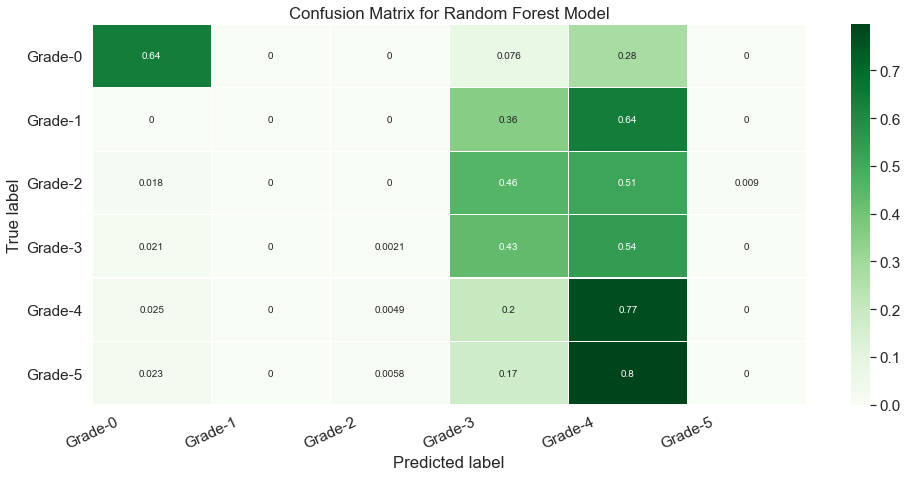

In [116]:
# Get and reshape confusion matrix data
matrix = confusion_matrix(y_test, y_pred_test)
matrix = matrix.astype('float') / matrix.sum(axis=1)[:, np.newaxis]

# Build the plot
plt.figure(figsize=(16,7))
sns.set(font_scale=1.4)
sns.heatmap(matrix, annot=True, annot_kws={'size':10},
            cmap=plt.cm.Greens, linewidths=0.2)

# Add labels to the plot
class_names = ['Grade-0','Grade-1','Grade-2','Grade-3','Grade-4','Grade-5']
tick_marks = np.arange(len(class_names))
tick_marks2 = tick_marks + 0.5
plt.xticks(tick_marks, class_names, rotation=25)
plt.yticks(tick_marks2, class_names, rotation=0)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

In [ ]:
# We do something else
We have to put same proportion of grades
Take a specific example where it is better